In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

In [2]:
NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

x_train[54, 12, 13, 1]

0.36862746

In [7]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters=10,
    kernel_size=(4, 4),
    strides=2,
    padding='same')(input_layer)

conv_layer_2 = Conv2D(
    filters=20,
    kernel_size=(3,3),
    strides=2,
    padding='same',
    )(conv_layer_1)
flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [11]:
input_layer = Input((32, 32, 3))
x = Conv2D(filters=32,
          kernel_size=3,
          strides=1,
          padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32,
          kernel_size=3,
          strides=2,
          padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64,
          kernel_size=3,
          strides=1,
          padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64,
          kernel_size=3,
          strides=2,
          padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [12]:
model.summary()


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)       

In [14]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.5582 - accuracy: 0.4564 - val_loss: 1.2619 - val_accuracy: 0.5566
Epoch 2/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.1355 - accuracy: 0.6004 - val_loss: 1.0380 - val_accuracy: 0.6314
Epoch 3/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.9885 - accuracy: 0.6555 - val_loss: 1.0489 - val_accuracy: 0.6269
Epoch 4/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.9094 - accuracy: 0.6829 - val_loss: 0.9501 - val_accuracy: 0.6740
Epoch 5/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8488 - accuracy: 0.7022 - val_loss: 0.8749 - val_accuracy: 0.6919
Epoch 6/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7941 - accuracy: 0.7230 - val_loss: 0.8212 - val_accuracy: 0.7177
Epoch 7/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7533 - accuracy: 0.7372 - val_loss: 0.7966 -

In [16]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 2s 192ms/step - loss: 0.9215 - accuracy: 0.6944


[0.9214625954627991, 0.6944000124931335]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

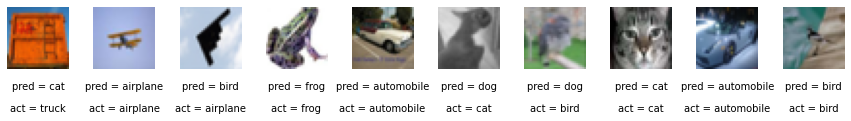

In [18]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)